In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
raw_df = pd.read_csv('./generalAccuracy_combined.csv.bz2', index_col=0)

#basic_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_basicMethods_evaluated.csv')
#GNN_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_GNNRank_reTrained_syncRank_evaluated.csv')
#full_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_basicMethods_fullDataset_evaluated.csv')
#full_GNN_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_GNNRank_fullDataset_evaluated.csv')
#full_df['iteration'] = 500
#full_GNN_df['iteration'] = 500
#raw_df = pd.concat([basic_df, GNN_df, full_df, full_GNN_df])

#raw_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_basicMethods_stratified_evaluated.csv')

fairPR_df = raw_df[raw_df['Ranking Method'] == 'fairPageRank'].copy()
fairPR_df = fairPR_df.replace({'fairPageRank': 'Fairness-Aware PageRank (not post-processed)'})
#raw_df = pd.read_csv('./data/post_processing/EPIRA_10trials.csv')
#raw_df = pd.read_csv('./data/post_processing/EPIRA99_10trials.csv')
#raw_df = pd.read_csv('./data/post_processing/FAstarIR_10trials.csv')
raw_df = pd.read_csv('./data/post_processing/FAstarIRp60_10trials.csv')

#raw_df['bias_applied'] = True
raw_df = raw_df.rename(columns={'sampling strategy': 'sampling method', 'recovery method': 'Ranking Method'})
raw_df = pd.concat([raw_df, fairPR_df])

raw_df

,trial,iteration,value,bias_applied,sampling method,Ranking Method,metric,group
0,0,40,0.315214,False,RandomSampling,davidScore,tau,Overall
1,0,40,0.325972,False,RandomSampling,davidScore,tau,Privileged
2,0,40,0.305213,False,RandomSampling,davidScore,tau,Unprivileged
3,0,40,0.341602,False,RandomSampling,davidScore,tau,Privileged within-group
4,0,40,0.317428,False,RandomSampling,davidScore,tau,Between groups
...,...,...,...,...,...,...,...,...
213627,9,3000,0.114268,False,RankSampling,Fairness-Aware PageRank (not post-processed),tau,Privileged within-group
213628,9,3000,0.119318,False,RankSampling,Fairness-Aware PageRank (not post-processed),tau,Between groups
213629,9,3000,0.121810,False,RankSampling,Fairness-Aware PageRank (not post-processed),tau,Unprivileged within-group
213630,9,3000,0.151526,False,RankSampling,Fairness-Aware PageRank (not post-processed),exposure,Privileged


In [47]:
sel_df = raw_df[raw_df.iteration == 500]
sel_df = sel_df.groupby(['iteration','bias_applied','sampling method','metric','group','Ranking Method']).mean().reset_index()
sel_df.loc[sel_df.metric == 'exposure', 'exposure'] = sel_df.value
sel_df.loc[sel_df.metric == 'tau', 'tau'] = sel_df.value
sel_df

,iteration,bias_applied,sampling method,metric,group,Ranking Method,trial,value,exposure,tau
0,500,False,OversampleMinority,exposure,Privileged,Fairness-Aware PageRank (not post-processed),4.5,0.149501,0.149501,NaN
1,500,False,OversampleMinority,exposure,Privileged,GNNRank,4.5,0.147071,0.147071,NaN
2,500,False,OversampleMinority,exposure,Privileged,davidScore,4.5,0.133026,0.133026,NaN
3,500,False,OversampleMinority,exposure,Privileged,randomRankRecovery,4.5,0.146778,0.146778,NaN
4,500,False,OversampleMinority,exposure,Privileged,rankCentrality,4.5,0.133671,0.133671,NaN
...,...,...,...,...,...,...,...,...,...,...
235,500,True,RankSampling,tau,Unprivileged within-group,Fairness-Aware PageRank (not post-processed),4.5,0.263578,NaN,0.263578
236,500,True,RankSampling,tau,Unprivileged within-group,GNNRank,4.5,0.282014,NaN,0.282014
237,500,True,RankSampling,tau,Unprivileged within-group,davidScore,4.5,0.458943,NaN,0.458943
238,500,True,RankSampling,tau,Unprivileged within-group,randomRankRecovery,4.5,0.718686,NaN,0.718686


In [48]:
priv_df = sel_df[sel_df.group == 'Privileged'].drop(columns=['iteration', 'trial', 'value'])
unpriv_df = sel_df[sel_df.group == 'Unprivileged'].drop(columns=['iteration', 'trial', 'value'])
priv_df

,bias_applied,sampling method,metric,group,Ranking Method,exposure,tau
0,False,OversampleMinority,exposure,Privileged,Fairness-Aware PageRank (not post-processed),0.149501,NaN
1,False,OversampleMinority,exposure,Privileged,GNNRank,0.147071,NaN
2,False,OversampleMinority,exposure,Privileged,davidScore,0.133026,NaN
3,False,OversampleMinority,exposure,Privileged,randomRankRecovery,0.146778,NaN
4,False,OversampleMinority,exposure,Privileged,rankCentrality,0.133671,NaN
20,False,OversampleMinority,tau,Privileged,Fairness-Aware PageRank (not post-processed),NaN,0.165456
21,False,OversampleMinority,tau,Privileged,GNNRank,NaN,0.107811
22,False,OversampleMinority,tau,Privileged,davidScore,NaN,0.137304
23,False,OversampleMinority,tau,Privileged,randomRankRecovery,NaN,0.710616
24,False,OversampleMinority,tau,Privileged,rankCentrality,NaN,0.132341


In [49]:
ratio_df = pd.merge(left=priv_df, left_on=['bias_applied','sampling method','metric','Ranking Method'],
                    right=unpriv_df, right_on=['bias_applied','sampling method','metric','Ranking Method'],
                    suffixes=('_priv', '_unpriv'))
ratio_df = ratio_df.drop(columns=['group_priv', 'group_unpriv'])
ratio_df['exposure ratio'] = ratio_df.exposure_unpriv / ratio_df.exposure_priv  # higher is better
ratio_df['error ratio'] = ratio_df.tau_priv / ratio_df.tau_unpriv  # lower is better
ratio_df

,bias_applied,sampling method,metric,Ranking Method,exposure_priv,tau_priv,exposure_unpriv,tau_unpriv,exposure ratio,error ratio
0,False,OversampleMinority,exposure,Fairness-Aware PageRank (not post-processed),0.149501,NaN,0.146560,NaN,0.980329,NaN
1,False,OversampleMinority,exposure,GNNRank,0.147071,NaN,0.148990,NaN,1.013049,NaN
2,False,OversampleMinority,exposure,davidScore,0.133026,NaN,0.163034,NaN,1.225583,NaN
3,False,OversampleMinority,exposure,randomRankRecovery,0.146778,NaN,0.149283,NaN,1.017065,NaN
4,False,OversampleMinority,exposure,rankCentrality,0.133671,NaN,0.162389,NaN,1.214839,NaN
5,False,OversampleMinority,tau,Fairness-Aware PageRank (not post-processed),NaN,0.165456,NaN,0.138008,NaN,1.198890
6,False,OversampleMinority,tau,GNNRank,NaN,0.107811,NaN,0.095572,NaN,1.128055
7,False,OversampleMinority,tau,davidScore,NaN,0.137304,NaN,0.125870,NaN,1.090846
8,False,OversampleMinority,tau,randomRankRecovery,NaN,0.710616,NaN,0.702809,NaN,1.011108
9,False,OversampleMinority,tau,rankCentrality,NaN,0.132341,NaN,0.120090,NaN,1.102017


In [50]:
exp_df = ratio_df[ratio_df.metric == 'exposure']
tau_df = ratio_df[ratio_df.metric == 'tau']

overall_df = pd.merge(left=exp_df[['bias_applied','sampling method','Ranking Method', 'exposure ratio']],
                      left_on=['bias_applied','sampling method','Ranking Method'],
                      right=tau_df[['bias_applied','sampling method','Ranking Method', 'error ratio']],
                      right_on=['bias_applied','sampling method','Ranking Method'])

tau_overall_df = sel_df[sel_df.group == 'Overall'].drop(columns=['iteration', 'metric', 'group', 'trial', 'exposure', 'value']).rename(columns={'tau': 'error'})
overall_df = pd.merge(left=overall_df, left_on=['bias_applied','sampling method','Ranking Method'],
                      right=tau_overall_df, right_on=['bias_applied','sampling method','Ranking Method'])

overall_df

,bias_applied,sampling method,Ranking Method,exposure ratio,error ratio,error
0,False,OversampleMinority,Fairness-Aware PageRank (not post-processed),0.980329,1.198890,0.152680
1,False,OversampleMinority,GNNRank,1.013049,1.128055,0.096320
2,False,OversampleMinority,davidScore,1.225583,1.090846,0.121089
3,False,OversampleMinority,randomRankRecovery,1.017065,1.011108,0.706555
4,False,OversampleMinority,rankCentrality,1.214839,1.102017,0.117558
5,False,RandomSampling,Fairness-Aware PageRank (not post-processed),0.994152,0.992520,0.109293
6,False,RandomSampling,GNNRank,1.027317,1.005049,0.080815
7,False,RandomSampling,davidScore,1.023437,0.982907,0.079538
8,False,RandomSampling,randomRankRecovery,1.005862,0.994136,0.709555
9,False,RandomSampling,rankCentrality,1.026633,1.003060,0.088120


In [51]:
overall_df = overall_df.replace({'OversampleMinority': 'Oversampling',
                                 'oversampling': 'Oversampling',
                                 'RankSampling': 'Rank-Based Sampling',
                                 'rankSampling': 'Rank-Based Sampling',
                                 'RandomSampling': 'Random Sampling',
                                 'randomSampling': 'Random Sampling',
                                 'fairPageRank': 'Fairness-Aware PageRank',
                                 'davidScore': "David's Score",
                                 'randomRankRecovery': 'Random Rank Recovery',
                                 'rankCentrality': 'Rank Centrality',
                                 'full dataset': 'Full Dataset'})

overall_df = overall_df.rename(columns={'sampling method': 'Sampling Method'})

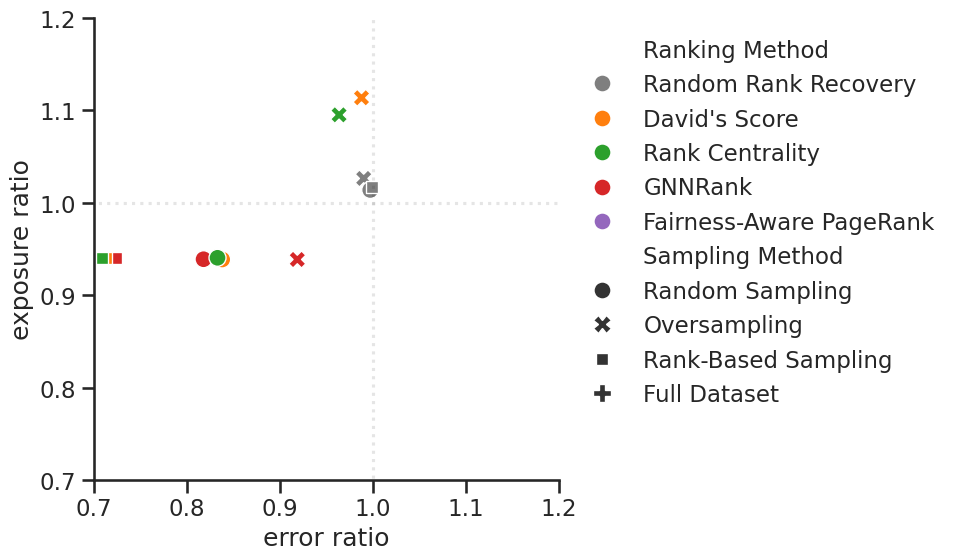

In [52]:
palette = sns.color_palette('tab10')
palette[0] = palette[7]
sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("talk") # larger font size
sns.set_style('ticks')

df = overall_df[(overall_df.bias_applied)].copy()# & (overall_df['Sampling Method'] == 'Random Sampling')]
ranking_methods = ['Random Rank Recovery', "David's Score", 'Rank Centrality', 'GNNRank', 'Fairness-Aware PageRank']
sampling_methods = ['Random Sampling', 'Oversampling', 'Rank-Based Sampling', 'Full Dataset']
df = df[df['Ranking Method'].isin(ranking_methods)]
#df['exposure ratio'] = df['exposure ratio'] + np.random.normal(0,0.001,len(df))
#df['error ratio'] = df['error ratio'] + np.random.normal(0,0.001,len(df))
#df['error'] = df['error'] + np.random.normal(0,0.001,len(df))

with sns.color_palette(palette):
    ax = sns.scatterplot(df, x='error ratio', y='exposure ratio', hue='Ranking Method', s=150, style='Sampling Method',
                         hue_order=ranking_methods,
                         style_order=sampling_methods)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1), frameon=False)
ax.set(xlim=(0.7,1.2), ylim=(0.7,1.2))
plt.plot([0,2], [1,1], color='black', linestyle='dotted', alpha=0.1)
plt.plot([1,1], [0,2], color='black', linestyle='dotted', alpha=0.1)
sns.despine()

## Seperate 1D Plots

In [53]:
sel_df2 = raw_df[(raw_df.iteration == 500) & (raw_df.bias_applied == True)].drop(columns=['iteration', 'bias_applied'])
sel_df2 = sel_df2.pivot(index=['trial', 'sampling method', 'Ranking Method'], columns=['metric', 'group'], values='value').reset_index()
sel_df2

metric trial     sampling method  \
group                              
0          0  OversampleMinority   
1          0  OversampleMinority   
2          0  OversampleMinority   
3          0  OversampleMinority   
4          0  OversampleMinority   
..       ...                 ...   
145        9        RankSampling   
146        9        RankSampling   
147        9        RankSampling   
148        9        RankSampling   
149        9        RankSampling   

metric                                Ranking Method       tau             \
group                                                  Overall Privileged   
0       Fairness-Aware PageRank (not post-processed)  0.239686   0.251504   
1                                            GNNRank  0.155571   0.154644   
2                                         davidScore  0.156534   0.161900   
3                                 randomRankRecovery  0.786828   0.796883   
4                                     rankCentrality  0.162932   0.159797   
..                                               ...       ...        ...   
145     Fairness-Aware PageRank (not post-processed)  0.312508   0.313939   
146                                          GNNRank  0.182396   0.137474   
147                                       davidScore  0.349926   0.282902   
148                               randomRankRecovery  0.700952   0.684935   
149                                   rankCentrality  0.303911   0.247992   

metric                                                      \
group  Unprivileged Privileged within-group Between groups   
0          0.229068                0.267291       0.242812   
1          0.165479                0.116724       0.169316   
2          0.155472                0.160100       0.162706   
3          0.777702                0.814794       0.788105   
4          0.170763                0.136172       0.170200   
..              ...                     ...            ...   
145        0.309595                0.320455       0.310465   
146        0.212176                0.074139       0.163893   
147        0.384283                0.162321       0.319915   
148        0.714249                0.661676       0.696729   
149        0.340505                0.148007       0.285193   

metric                             exposure               
group  Unprivileged within-group Privileged Unprivileged  
0                       0.197043   0.142876     0.153184  
1                       0.158072   0.152708     0.143353  
2                       0.141077   0.138070     0.157990  
3                       0.756968   0.148554     0.147506  
4                       0.171876   0.139953     0.156107  
..                           ...        ...          ...  
145                     0.307682   0.142504     0.153556  
146                     0.299941   0.152708     0.143353  
147                     0.474748   0.152708     0.143353  
148                     0.749455   0.143412     0.152648  
149                     0.430837   0.152708     0.143353  

[150 rows x 11 columns]

In [54]:
sel_df3 = sel_df2.copy()
sel_df3['exposure ratio'] = sel_df3['exposure']['Unprivileged'] / sel_df3['exposure']['Privileged']
sel_df3['error ratio'] = sel_df3['tau']['Unprivileged'] / sel_df3['tau']['Privileged']
sel_df3['exposure difference'] = sel_df3['exposure']['Unprivileged'] - sel_df3['exposure']['Privileged']
sel_df3['error difference'] = sel_df3['tau']['Unprivileged'] - sel_df3['tau']['Privileged']
sel_df3['error'] = sel_df3['tau']['Overall']
sel_df3 = sel_df3[['trial', 'sampling method', 'Ranking Method', 'exposure ratio', 'error ratio', 'error', 'error difference', 'exposure difference']].droplevel('group', axis=1)
sel_df3 = sel_df3.replace({'OversampleMinority': 'Oversampling',
                            'oversampling': 'Oversampling',
                            'RankSampling': 'Rank-Based Sampling',
                            'rankSampling': 'Rank-Based Sampling',
                            'RandomSampling': 'Random Sampling',
                            'randomSampling': 'Random Sampling',
                            'fairPageRank': 'Fairness-Aware PageRank',
                            'davidScore': "David's Score",
                            'randomRankRecovery': 'Random Rank Recovery',
                            'rankCentrality': 'Rank Centrality',
                            'full dataset': 'Full Dataset'})

sel_df3 = sel_df3.rename(columns={'sampling method': 'Sampling Method'})
sel_df3

metric,trial,Sampling Method,Ranking Method,exposure ratio,error ratio,error,error difference,exposure difference
0,0,Oversampling,Fairness-Aware PageRank (not post-processed),1.072143,0.910795,0.239686,-0.022436,0.010307
1,0,Oversampling,GNNRank,0.938740,1.070066,0.155571,0.010835,-0.009355
2,0,Oversampling,David's Score,1.144272,0.960296,0.156534,-0.006428,0.019920
3,0,Oversampling,Random Rank Recovery,0.992949,0.975931,0.786828,-0.019180,-0.001047
4,0,Oversampling,Rank Centrality,1.115427,1.068624,0.162932,0.010966,0.016154
...,...,...,...,...,...,...,...,...
145,9,Rank-Based Sampling,Fairness-Aware PageRank (not post-processed),1.077553,0.986163,0.312508,-0.004344,0.011052
146,9,Rank-Based Sampling,GNNRank,0.938740,1.543389,0.182396,0.074702,-0.009355
147,9,Rank-Based Sampling,David's Score,0.938740,1.358360,0.349926,0.101381,-0.009355
148,9,Rank-Based Sampling,Random Rank Recovery,1.064402,1.042798,0.700952,0.029314,0.009236


In [55]:
# Okabe-Ito color palette
lightblue = "#56B4E9"
yellow = "#F0E442"
orange = "#E69F00"
green = "#009E73"
purple = "#CC79A7"
red = "#D55E00"
blue = "#0072B2"
black = "#000000"
#palette = [black, orange, lightblue, green, yellow, blue, red, purple] # original order
palette = [black, orange, lightblue, green, red, purple] # custom order

#palette = sns.color_palette('tab10')
#palette[0] = palette[7]

sns.set_context("talk") # larger font size
sns.set_style('ticks')

df = sel_df3
ranking_methods = ['Random Rank Recovery', "David's Score", 'Rank Centrality', 'GNNRank', 'Fairness-Aware PageRank (not post-processed)']
sampling_methods = ['Full Dataset', 'Random Sampling', 'Oversampling', 'Rank-Based Sampling']
metrics = ['exposure difference', 'error difference', 'error']

df = df[df['Ranking Method'].isin(ranking_methods)]
df = df.melt(id_vars=['Sampling Method', 'Ranking Method'], value_vars=['error', 'exposure difference', 'error difference'])

df['metric_order'] = df.metric.map(metrics.index)
df['sampling_order'] = df['Sampling Method'].map(sampling_methods.index)
df['ranking_order'] = df['Ranking Method'].map(list(reversed(ranking_methods)).index)
df = df.sort_values(by=['ranking_order', 'sampling_order', 'metric_order']).drop(columns=['ranking_order', 'sampling_order', 'metric_order'])

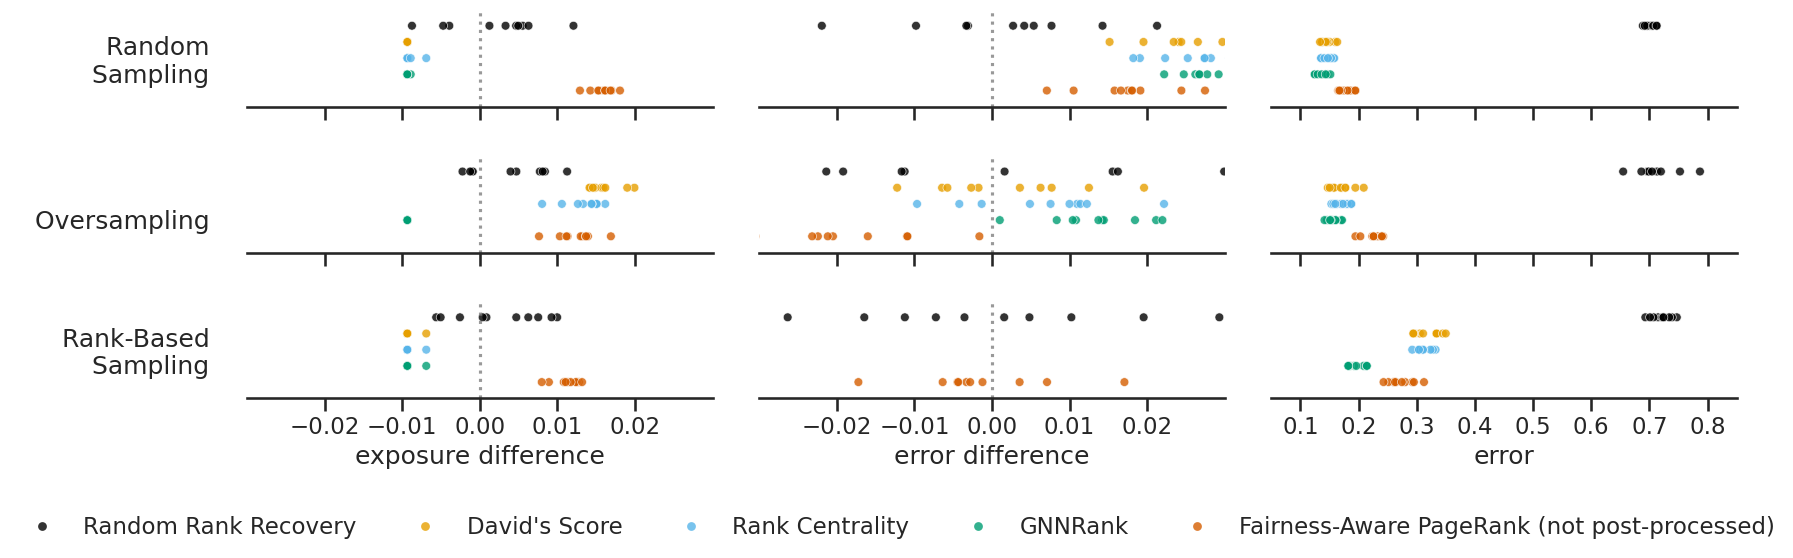

In [56]:
with sns.color_palette(palette):
    #g = sns.FacetGrid(df, row='Sampling Method', col='metric',
    #                  margin_titles=True)
    #g.map_dataframe(sns.pointplot, x='value', y='Ranking Method', hue='Ranking Method')
    g = sns.relplot(df, x='value', y='Ranking Method', hue='Ranking Method', kind='scatter', #style='Sampling Method',
                    row='Sampling Method', col='metric',
                    hue_order=ranking_methods, style_order=sampling_methods,
                    s=40, alpha=0.8, aspect=4/1, height=1.8, facet_kws={'sharey': True, 'sharex': False})

sns.move_legend(g, 'upper left', ncol=5, title=None, bbox_to_anchor=(0.13, 0))#
g.refline(x=0, linestyle='dotted', alpha=0.8)
g.figure.subplots_adjust(wspace=0.1, hspace=0.5)

for (row_val, col_val), ax in g.axes_dict.items():
    ax.set_title(None)
    ax.set_yticks([-100])
    ax.set_ylim((-1,5))
    
    if row_val == 'Rank-Based Sampling':
        ax.set_xlabel(col_val)
    else:
        ax.set_xticklabels([])

    if col_val == 'error':
        ax.set(xlim=(0.05,0.85))
        ax.set_xticks([.1,.2,.3,.4,.5,.6,.7,.8])
    else:
        ax.set(xlim=(-0.03,0.03))
        ax.set_xticks([-0.02,-0.01,0,0.01,0.02])
    
    if col_val == 'exposure difference':
        ax.set_ylabel('    \n'.join(row_val.split()) + '    ', rotation=0, horizontalalignment='right', y=0.2)

sns.despine(left=True)
#plt.savefig('./data/others_results/combined_results_1D.png', dpi=300, bbox_inches="tight")

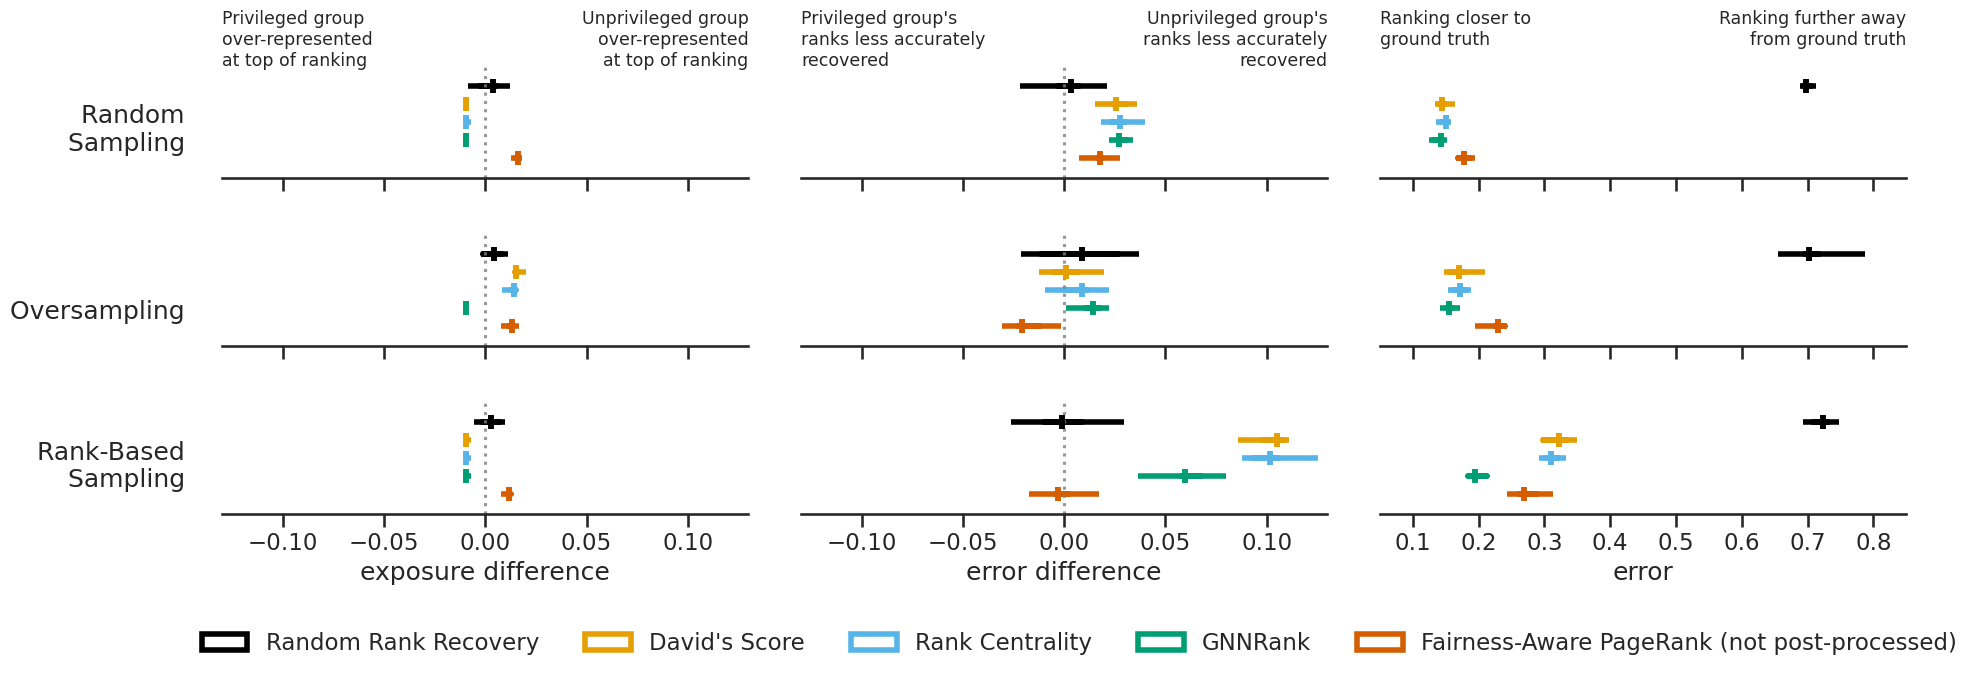

In [57]:
with sns.color_palette(palette):
    #g = sns.FacetGrid(df, row='Sampling Method', col='metric',
    #                  margin_titles=True)
    #g.map_dataframe(sns.pointplot, x='value', y='Ranking Method', hue='Ranking Method')
    g = sns.catplot(df, x='value', kind='box', #style='Sampling Method',
                    row='Sampling Method', col='metric', hue='Ranking Method',
                    hue_order=ranking_methods, sharex=False, sharey=True,
                    aspect=3/1, height=2,
                    # sns.boxplot properties
                    fill=False, whis=(0, 100), linewidth=4,
                    # plt.boxplot properties & Line2D properties
                    medianprops={'marker': '|', 'markeredgewidth': 4, 'markersize': 10}, showcaps=False,
                    #showmeans=True, meanprops={'marker': '|', 'markeredgecolor': 'black', 'markeredgewidth': 2, 'markersize': 10},
                    widths=0)
    # s=40, alpha=0.8, facet_kws={'sharey': True, 'sharex': False}, height=1.8

sns.move_legend(g, 'upper left', ncol=5, title=None, bbox_to_anchor=(0.008, 0))

g.refline(x=0, linestyle='dotted', alpha=0.8)
g.figure.subplots_adjust(wspace=0.1, hspace=0.5)

for (row_val, col_val), ax in g.axes_dict.items():
    ax.set_title(None)
    ax.set_yticks([-100])
    ax.set_ylim((0.5,-0.5))
    
    if col_val == 'error':
        ax.set(xlim=(0.05,0.85))
        ax.set_xticks([.1,.2,.3,.4,.5,.6,.7,.8])
        #ax.set_xscale('log', base=10)
    else:
        #log_lim = 0.86
        #log_lim = 0.65
        #ax.set(xlim=(log_lim,1/log_lim))
        #ax.set_xscale('log', base=10)
        #ticks = [.9,.95,1,1.05,1.1,1.15]
        #ticks = [0.7,0.8,0.9,1,1.1,1.2,1.3,1.4]
        #ticklabels = [0.7,0.8,0.9,1,'',1.2,'',1.4]
        #ax.set_xticks(ticks)
        #ax.set_xticklabels(ticklabels)
        #ax.set(xlim=(-0.025,0.025))
        #ax.set_xticks([-0.02,-0.01,0,0.01,0.02])
        ax.set(xlim=(-0.13,0.13))
        ax.set_xticks([-0.1,-0.05,0,0.05,0.1])

    if row_val == 'Rank-Based Sampling':
        ax.set_xlabel(col_val)
    else:
        ax.set_xticklabels([])
    
    if col_val == 'exposure difference':
        ax.set_ylabel('    \n'.join(row_val.split()) + '    ', rotation=0, horizontalalignment='right', y=0.2)
    
    if row_val == 'Random Sampling':
        y = -.5
        y_offset = -.5
        lim = -0.13 #0.65
        inv_lim = 0.13 #1/lim
        if col_val == 'exposure difference':
            ax.annotate('Privileged group\nover-represented\nat top of ranking',
                        xy=(lim, y), xytext=(lim,y+y_offset), horizontalalignment='left', verticalalignment='top', fontsize='x-small')
            ax.annotate('Unprivileged group\nover-represented\nat top of ranking',
                        xy=(inv_lim, y), xytext=(inv_lim,y+y_offset), horizontalalignment='right', verticalalignment='top', fontsize='x-small')
        elif col_val == 'error difference':
            ax.annotate('Privileged group\'s\nranks less accurately\nrecovered',
                        xy=(lim, y), xytext=(lim,y+y_offset), horizontalalignment='left', verticalalignment='top', fontsize='x-small')
            ax.annotate('Unprivileged group\'s\nranks less accurately\nrecovered',
                        xy=(inv_lim, y), xytext=(inv_lim,y+y_offset), horizontalalignment='right', verticalalignment='top', fontsize='x-small')
        elif col_val == 'error':
            ax.annotate('Ranking closer to\nground truth',
                        xy=(0.05, y), xytext=(0.05,y+y_offset), horizontalalignment='left', verticalalignment='top', fontsize='x-small')
            ax.annotate('Ranking further away\nfrom ground truth',
                        xy=(.85, y), xytext=(0.85,y+y_offset), horizontalalignment='right', verticalalignment='top', fontsize='x-small')

sns.despine(left=True)
plt.savefig('./data/others_results/FAstarIRp60_results_fairPR_diff_short.png', dpi=300, bbox_inches="tight")